# Projet ML : Prédiction Campagnes de Télémarketing Bancaire

**Dataset:** Bank Marketing (UCI)

## Objectif
Prédire si un client souscrit à un dépôt à terme après une campagne téléphonique.

## Plan
1. Exploration des données
2. Preprocessing
3. Modélisation (5 algorithmes)
4. Évaluation et comparaison
5. Conclusions

## 1. Description du Problème

**Contexte :** Une banque portugaise a réalisé des campagnes de télémarketing pour promouvoir des dépôts à terme.

**Problème :** Classification binaire - prédire si un client va souscrire (yes/no).

**Variable cible :** `y` (yes/no)

**Features principales (20 variables) :**
- **Client** : age, job, marital, education, default, housing, loan
- **Contact** : contact, month, day_of_week, duration (non utilisée)
- **Campagne** : campaign, pdays, previous, poutcome
- **Économie** : emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

**Algorithmes testés :**
1. Régression Logistique
2. Decision Tree
3. Naive Bayes
4. Perceptron
5. KNN

**Métriques :** Accuracy, Precision, Recall, F1-Score, ROC-AUC

## 2. Import et Chargement des Données

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_auc_score, confusion_matrix, roc_curve, auc)
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("Bibliothèques chargées")

Bibliothèques chargées


In [28]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
print(f"Dataset chargé : {df.shape[0]} lignes, {df.shape[1]} colonnes")

Dataset chargé : 41188 lignes, 21 colonnes


## 3. Exploration des Données

In [29]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [30]:
print("Infos dataset:")
print(df.info())
print("\nStatistiques:")
df.describe()

Infos dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [31]:
# Vérification valeurs manquantes
missing = df.isnull().sum()
if missing.sum() == 0:
    print("Pas de valeurs NaN")
else:
    print(missing[missing > 0])

Pas de valeurs NaN


Distribution variable cible:
y
no     36548
yes     4640
Name: count, dtype: int64

Proportions:
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


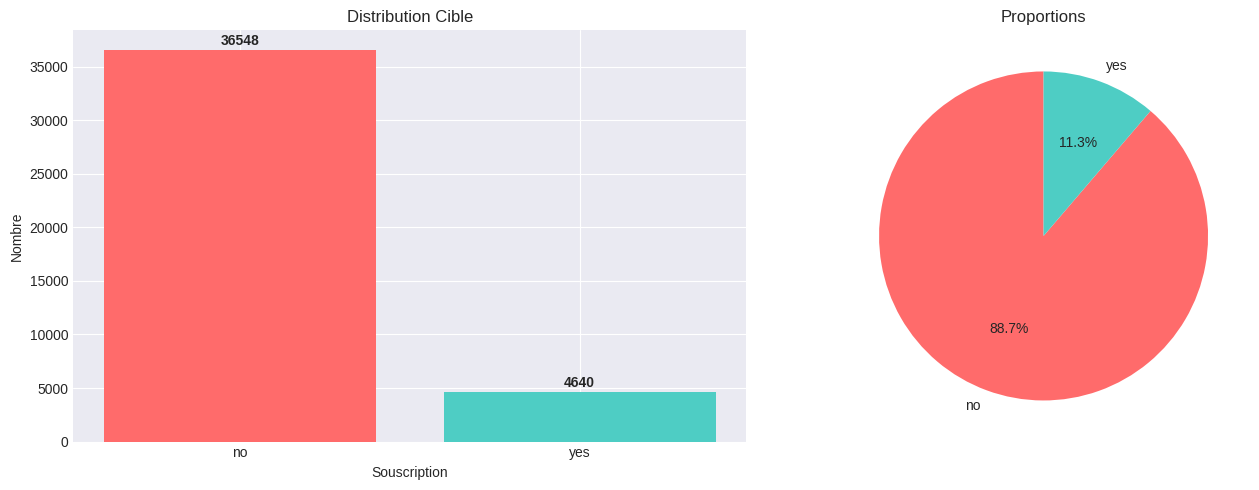


Ratio déséquilibre : 7.88 (no/yes)


In [32]:
# Distribution variable cible
target_counts = df['y'].value_counts()
target_props = df['y'].value_counts(normalize=True) * 100

print("Distribution variable cible:")
print(target_counts)
print(f"\nProportions:\n{target_props}")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(target_counts.index, target_counts.values, color=['#ff6b6b', '#4ecdc4'])
axes[0].set_title('Distribution Cible')
axes[0].set_xlabel('Souscription')
axes[0].set_ylabel('Nombre')
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 500, str(v), ha='center', fontweight='bold')

axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', 
            colors=['#ff6b6b', '#4ecdc4'], startangle=90)
axes[1].set_title('Proportions')

plt.tight_layout()
plt.show()

ratio = target_counts['no'] / target_counts['yes']
print(f"\nRatio déséquilibre : {ratio:.2f} (no/yes)")

In [33]:
# Variables catégorielles
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')

print(f"Variables catégorielles ({len(categorical_cols)}): {categorical_cols}\n")

# Catégories par variable
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} catégories")
    
# Valeurs "unknown"
print("\nValeurs 'unknown':")
for col in categorical_cols:
    unknown_count = (df[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count} ({unknown_count/len(df)*100:.1f}%)")

Variables catégorielles (10): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

job: 12 catégories
marital: 4 catégories
education: 8 catégories
default: 3 catégories
housing: 3 catégories
loan: 3 catégories
contact: 2 catégories
month: 10 catégories
day_of_week: 5 catégories
poutcome: 3 catégories

Valeurs 'unknown':
job: 330 (0.8%)
marital: 80 (0.2%)
education: 1731 (4.2%)
default: 8597 (20.9%)
housing: 990 (2.4%)
loan: 990 (2.4%)


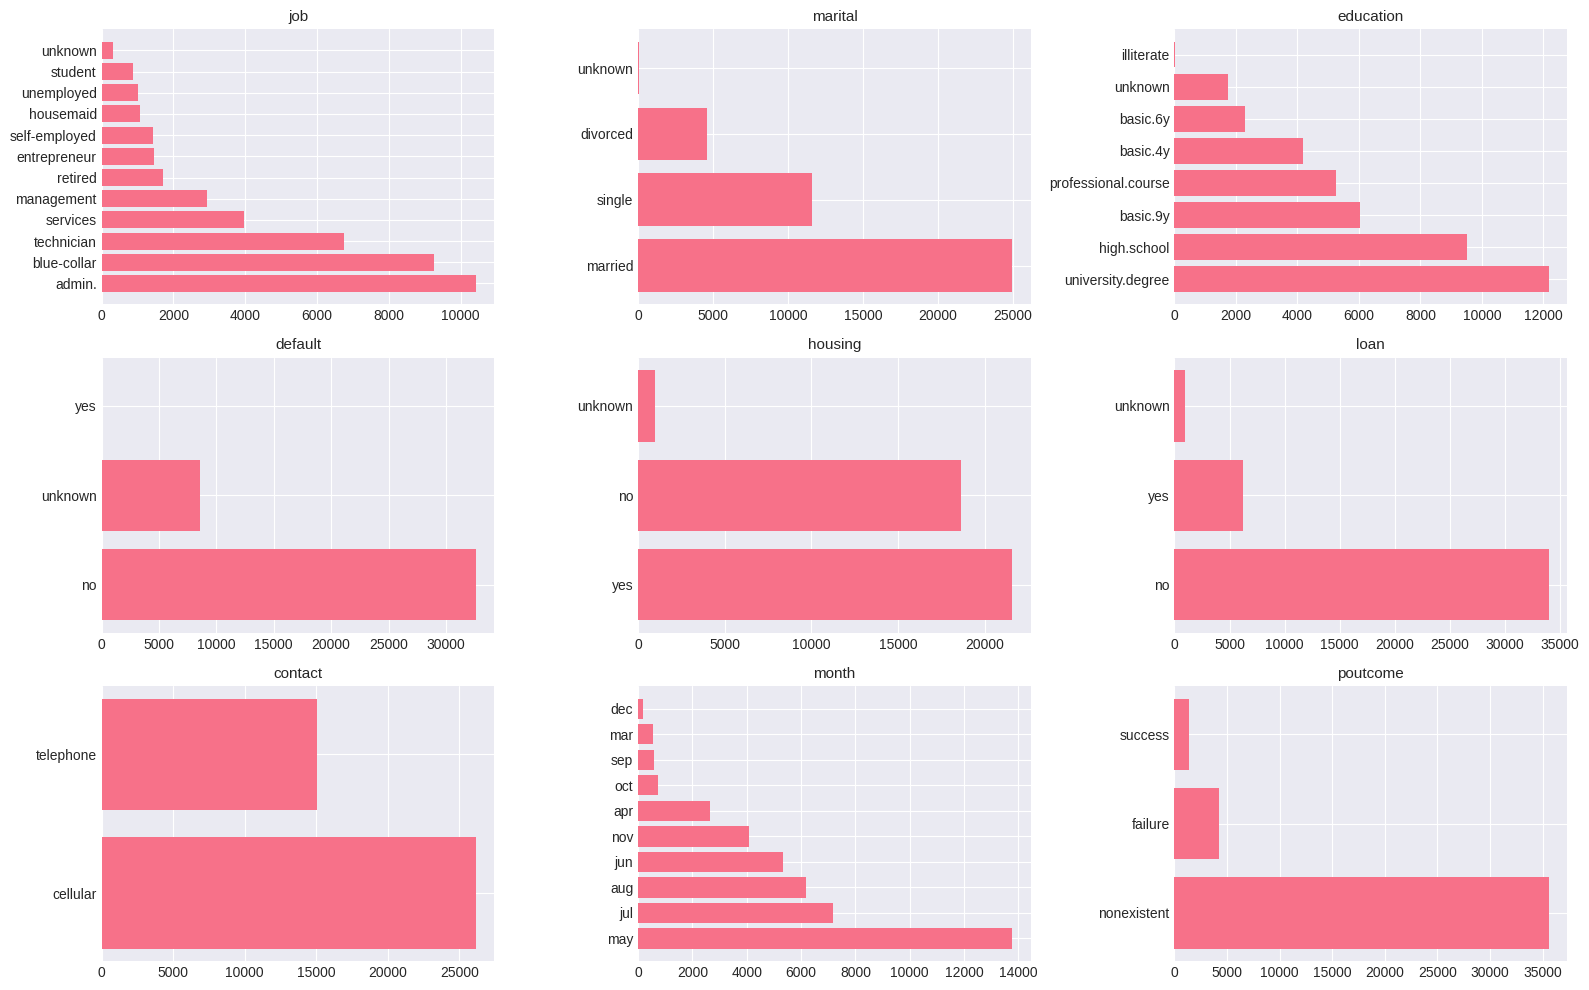

In [34]:
# Visualisation variables catégorielles
fig, axes = plt.subplots(3, 3, figsize=(16, 10))
axes = axes.ravel()

cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for idx, col in enumerate(cat_cols):
    value_counts = df[col].value_counts()
    axes[idx].barh(range(len(value_counts)), value_counts.values)
    axes[idx].set_yticks(range(len(value_counts)))
    axes[idx].set_yticklabels(value_counts.index)
    axes[idx].set_title(f'{col}', fontsize=11)
    
plt.tight_layout()
plt.show()

In [35]:
# Variables numériques
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Variables numériques ({len(numerical_cols)}): {numerical_cols}\n")
df[numerical_cols].describe().T

Variables numériques (10): ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']



,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


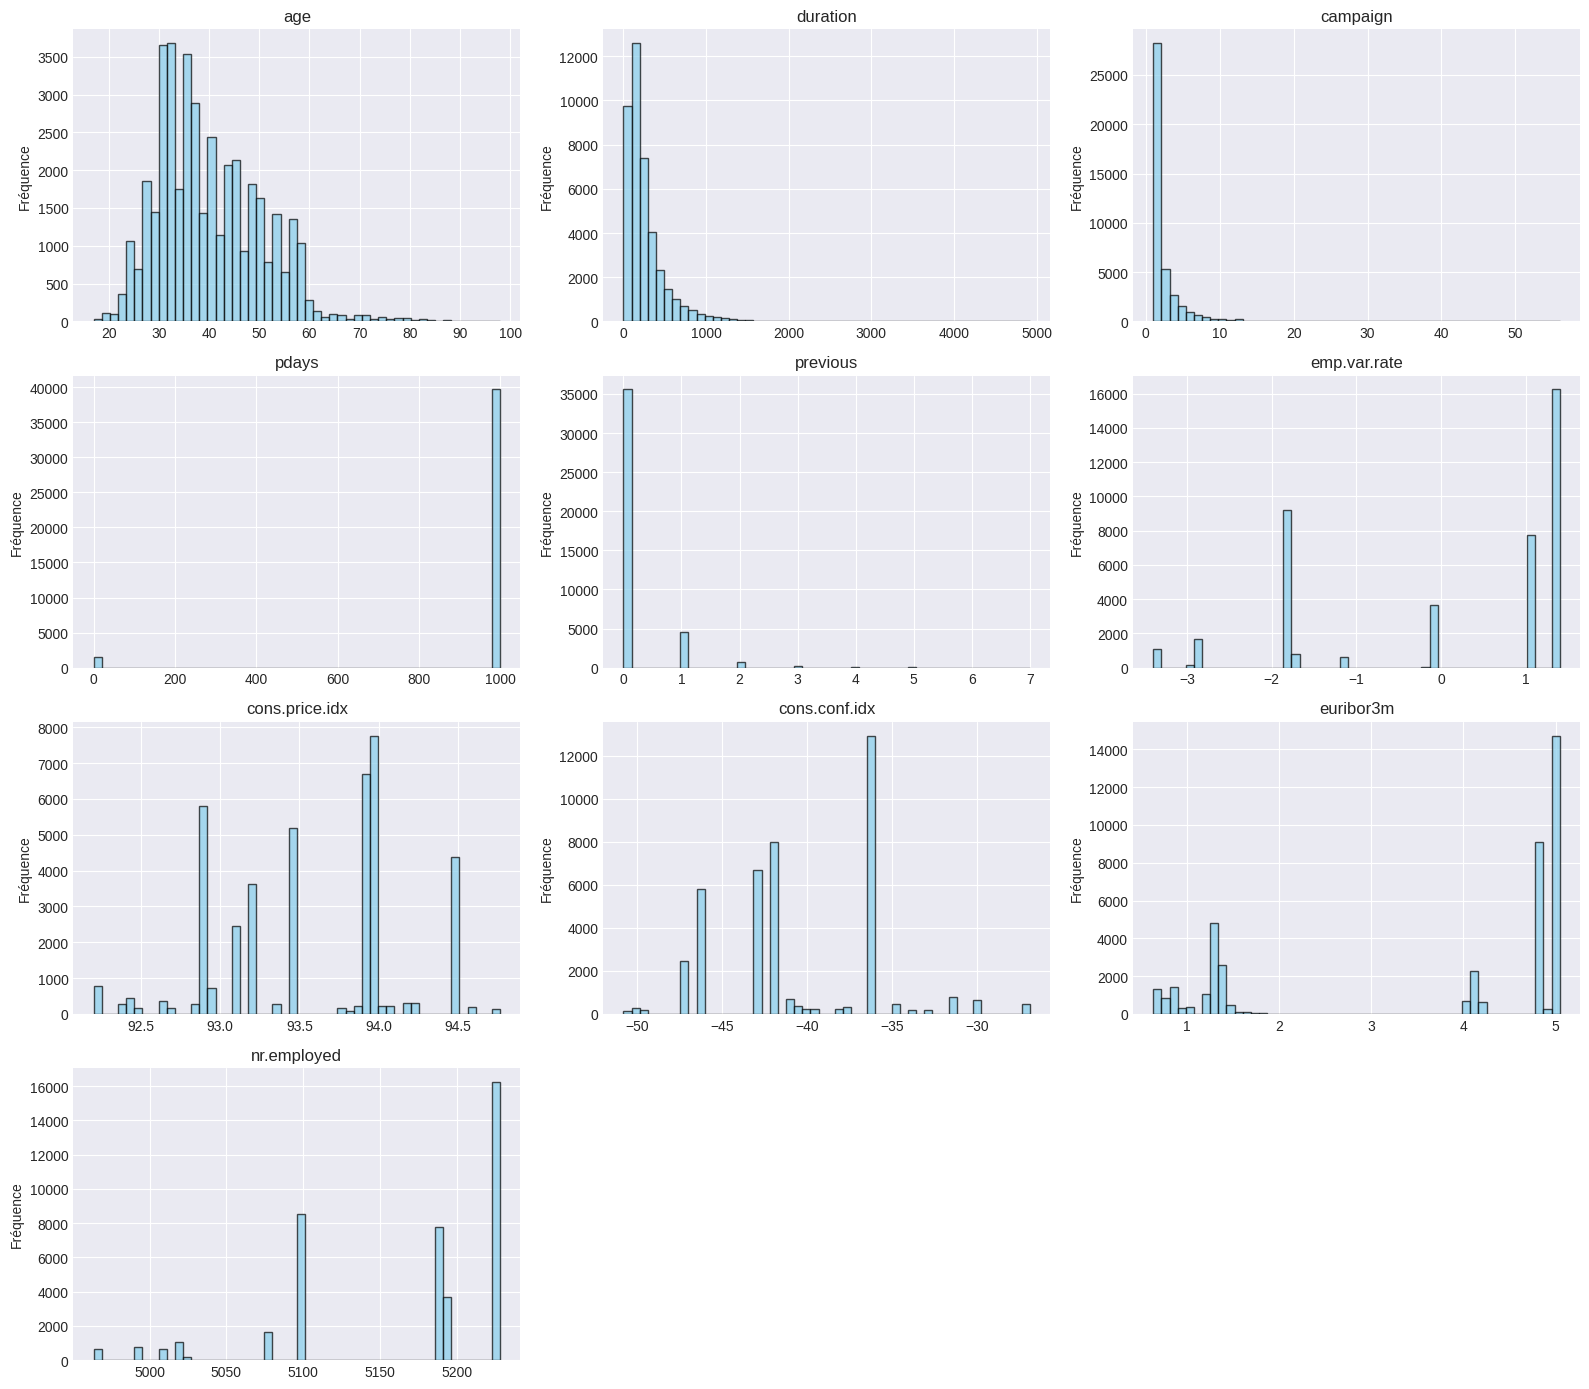

In [36]:
# Distributions numériques
fig, axes = plt.subplots(4, 3, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Fréquence')
    
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

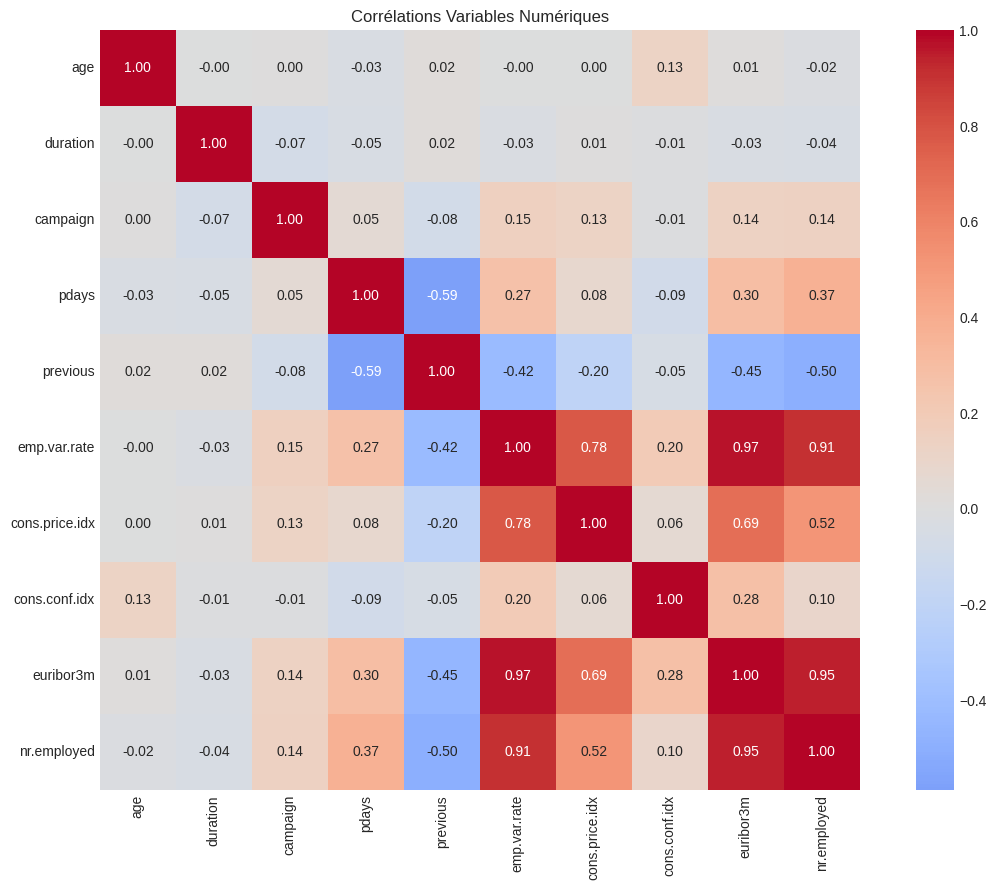

Corrélations fortes (|r| > 0.7):
emp.var.rate <-> cons.price.idx: 0.775
emp.var.rate <-> euribor3m: 0.972
emp.var.rate <-> nr.employed: 0.907
euribor3m <-> nr.employed: 0.945


In [37]:
# Matrice de corrélation
plt.figure(figsize=(12, 9))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Corrélations Variables Numériques')
plt.tight_layout()
plt.show()

# Corrélations fortes
print("Corrélations fortes (|r| > 0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

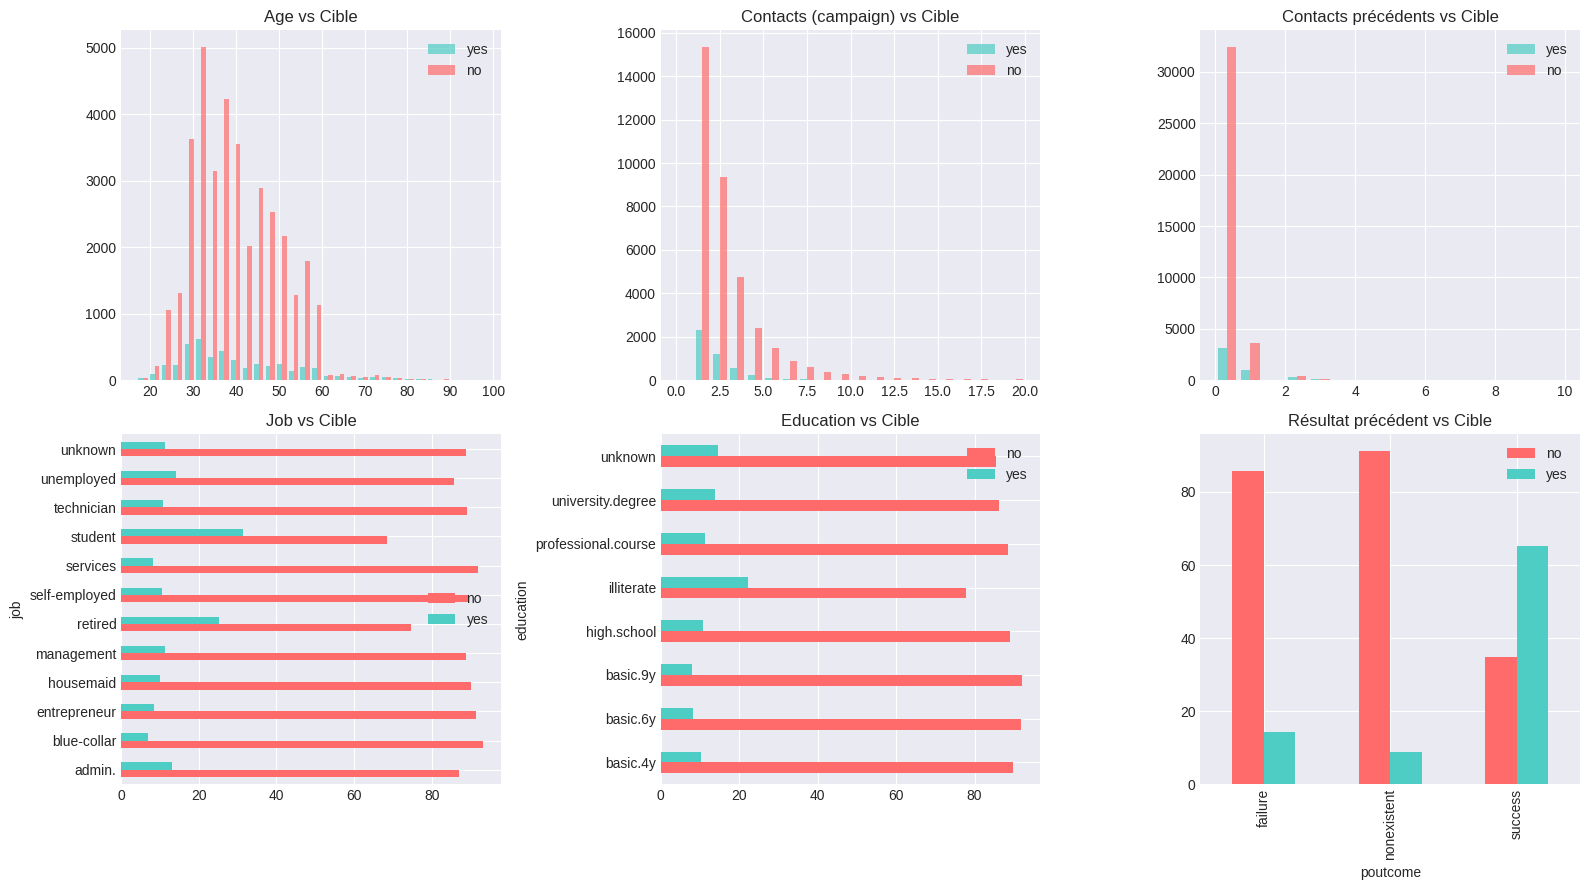

In [38]:
# Relation features/cible
fig, axes = plt.subplots(2, 3, figsize=(16, 9))

# Age
axes[0, 0].hist([df[df['y']=='yes']['age'], df[df['y']=='no']['age']], 
                bins=30, label=['yes', 'no'], color=['#4ecdc4', '#ff6b6b'], alpha=0.7)
axes[0, 0].set_title('Age vs Cible')
axes[0, 0].legend()

# Campaign
axes[0, 1].hist([df[df['y']=='yes']['campaign'], df[df['y']=='no']['campaign']], 
                bins=20, label=['yes', 'no'], color=['#4ecdc4', '#ff6b6b'], alpha=0.7, range=(0, 20))
axes[0, 1].set_title('Contacts (campaign) vs Cible')
axes[0, 1].legend()

# Previous
axes[0, 2].hist([df[df['y']=='yes']['previous'], df[df['y']=='no']['previous']], 
                bins=15, label=['yes', 'no'], color=['#4ecdc4', '#ff6b6b'], alpha=0.7, range=(0, 10))
axes[0, 2].set_title('Contacts précédents vs Cible')
axes[0, 2].legend()

# Job
job_target = pd.crosstab(df['job'], df['y'], normalize='index') * 100
job_target.plot(kind='barh', ax=axes[1, 0], color=['#ff6b6b', '#4ecdc4'])
axes[1, 0].set_title('Job vs Cible')
axes[1, 0].legend(['no', 'yes'])

# Education
edu_target = pd.crosstab(df['education'], df['y'], normalize='index') * 100
edu_target.plot(kind='barh', ax=axes[1, 1], color=['#ff6b6b', '#4ecdc4'])
axes[1, 1].set_title('Education vs Cible')
axes[1, 1].legend(['no', 'yes'])

# Poutcome
pout_target = pd.crosstab(df['poutcome'], df['y'], normalize='index') * 100
pout_target.plot(kind='bar', ax=axes[1, 2], color=['#ff6b6b', '#4ecdc4'])
axes[1, 2].set_title('Résultat précédent vs Cible')
axes[1, 2].legend(['no', 'yes'])

plt.tight_layout()
plt.show()

### Observations EDA :

- **Classes déséquilibrées** : ~88% "no" vs ~11% "yes"
- Valeurs "unknown" dans certaines variables catégorielles
- Corrélations fortes entre variables économiques
- Variable "duration" sera retirée (connue qu'après l'appel)
- `poutcome` semble très discriminant

## 4. Preprocessing

In [39]:
df_processed = df.copy()

# Retirer 'duration'
df_processed = df_processed.drop('duration', axis=1)
print("Variable 'duration' supprimée")

# Encoder cible
df_processed['y'] = df_processed['y'].map({'no': 0, 'yes': 1})
print("Cible encodée: no->0, yes->1")

# Identifier features
categorical_features = df_processed.select_dtypes(include=['object']).columns.tolist()
numerical_features = df_processed.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('y')

print(f"\nCatégorielles ({len(categorical_features)}): {categorical_features}")
print(f"Numériques ({len(numerical_features)}): {numerical_features}")
print(f"\nDimensions finales: {df_processed.shape}")

Variable 'duration' supprimée
Cible encodée: no->0, yes->1

Catégorielles (10): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numériques (9): ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Dimensions finales: (41188, 20)


In [40]:
# Encodage variables catégorielles
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"{col}: {len(le.classes_)} catégories")

print("\nEncodage terminé")
df_processed.head()

job: 12 catégories
marital: 4 catégories
education: 8 catégories
default: 3 catégories
housing: 3 catégories
loan: 3 catégories
contact: 2 catégories
month: 10 catégories
day_of_week: 5 catégories
poutcome: 3 catégories

Encodage terminé


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [41]:
# Séparation features/cible
X = df_processed.drop('y', axis=1)
y = df_processed['y']

print(f"X: {X.shape}, y: {y.shape}")
print(f"Classe 0: {(y==0).sum()} ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"Classe 1: {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTrain: {X_train.shape}, Test: {X_test.shape}")
print(f"Train - Classe 0: {(y_train==0).sum()}, Classe 1: {(y_train==1).sum()}")
print(f"Test - Classe 0: {(y_test==0).sum()}, Classe 1: {(y_test==1).sum()}")

X: (41188, 19), y: (41188,)
Classe 0: 36548 (88.7%)
Classe 1: 4640 (11.3%)

Train: (32950, 19), Test: (8238, 19)
Train - Classe 0: 29238, Classe 1: 3712
Test - Classe 0: 7310, Classe 1: 928


In [42]:
# Normalisation
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print(f"Normalisation appliquée sur {len(numerical_features)} features numériques")
print("Données prêtes pour modélisation")

Normalisation appliquée sur 9 features numériques
Données prêtes pour modélisation


## 5. Modélisation

Entraînement de 5 algorithmes :
- Régression Logistique
- Decision Tree
- Naive Bayes
- Perceptron
- KNN

In [43]:
# Initialisation modèles
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Perceptron': Perceptron(class_weight='balanced', max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

print(f"{len(models)} modèles initialisés")

5 modèles initialisés


In [44]:
# Entraînement
import time

trained_models = {}
predictions = {}
prediction_probas = {}
training_times = {}

for name, model in models.items():
    print(f"Entraînement {name}...", end=' ')
    
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    trained_models[name] = model
    predictions[name] = y_pred
    prediction_probas[name] = y_pred_proba
    training_times[name] = training_time
    
    print(f"OK ({training_time:.2f}s) - Acc train: {model.score(X_train_scaled, y_train):.3f}, Acc test: {accuracy_score(y_test, y_pred):.3f}")

print("\nEntraînement terminé")

Entraînement Logistic Regression... OK (1.46s) - Acc train: 0.810, Acc test: 0.813
Entraînement Decision Tree... OK (0.12s) - Acc train: 0.858, Acc test: 0.850
Entraînement Naive Bayes... OK (0.01s) - Acc train: 0.834, Acc test: 0.840
Entraînement Perceptron... OK (0.02s) - Acc train: 0.835, Acc test: 0.839
Entraînement KNN... OK (0.00s) - Acc train: 0.912, Acc test: 0.893

Entraînement terminé


## 6. Évaluation et Comparaison

In [45]:
# Calcul métriques
results = []

for name in models.keys():
    y_pred = predictions[name]
    y_pred_proba = prediction_probas[name]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    results.append({
        'Modèle': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Temps (s)': training_times[name]
    })

results_df = pd.DataFrame(results).sort_values('F1-Score', ascending=False)
results_df.style.format({
    'Accuracy': '{:.4f}',
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1-Score': '{:.4f}',
    'ROC-AUC': '{:.4f}',
    'Temps (s)': '{:.2f}'
}).background_gradient(subset=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'], cmap='RdYlGn')

,Modèle,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Temps (s)
1,Decision Tree,0.8496,0.3909,0.6002,0.4734,0.7617,0.12
0,Logistic Regression,0.8126,0.3319,0.6552,0.4406,0.7959,1.46
2,Naive Bayes,0.8398,0.3548,0.5162,0.4205,0.7731,0.01
4,KNN,0.8934,0.5551,0.2716,0.3647,0.7274,0.00
3,Perceptron,0.8393,0.3032,0.3287,0.3154,nan,0.02


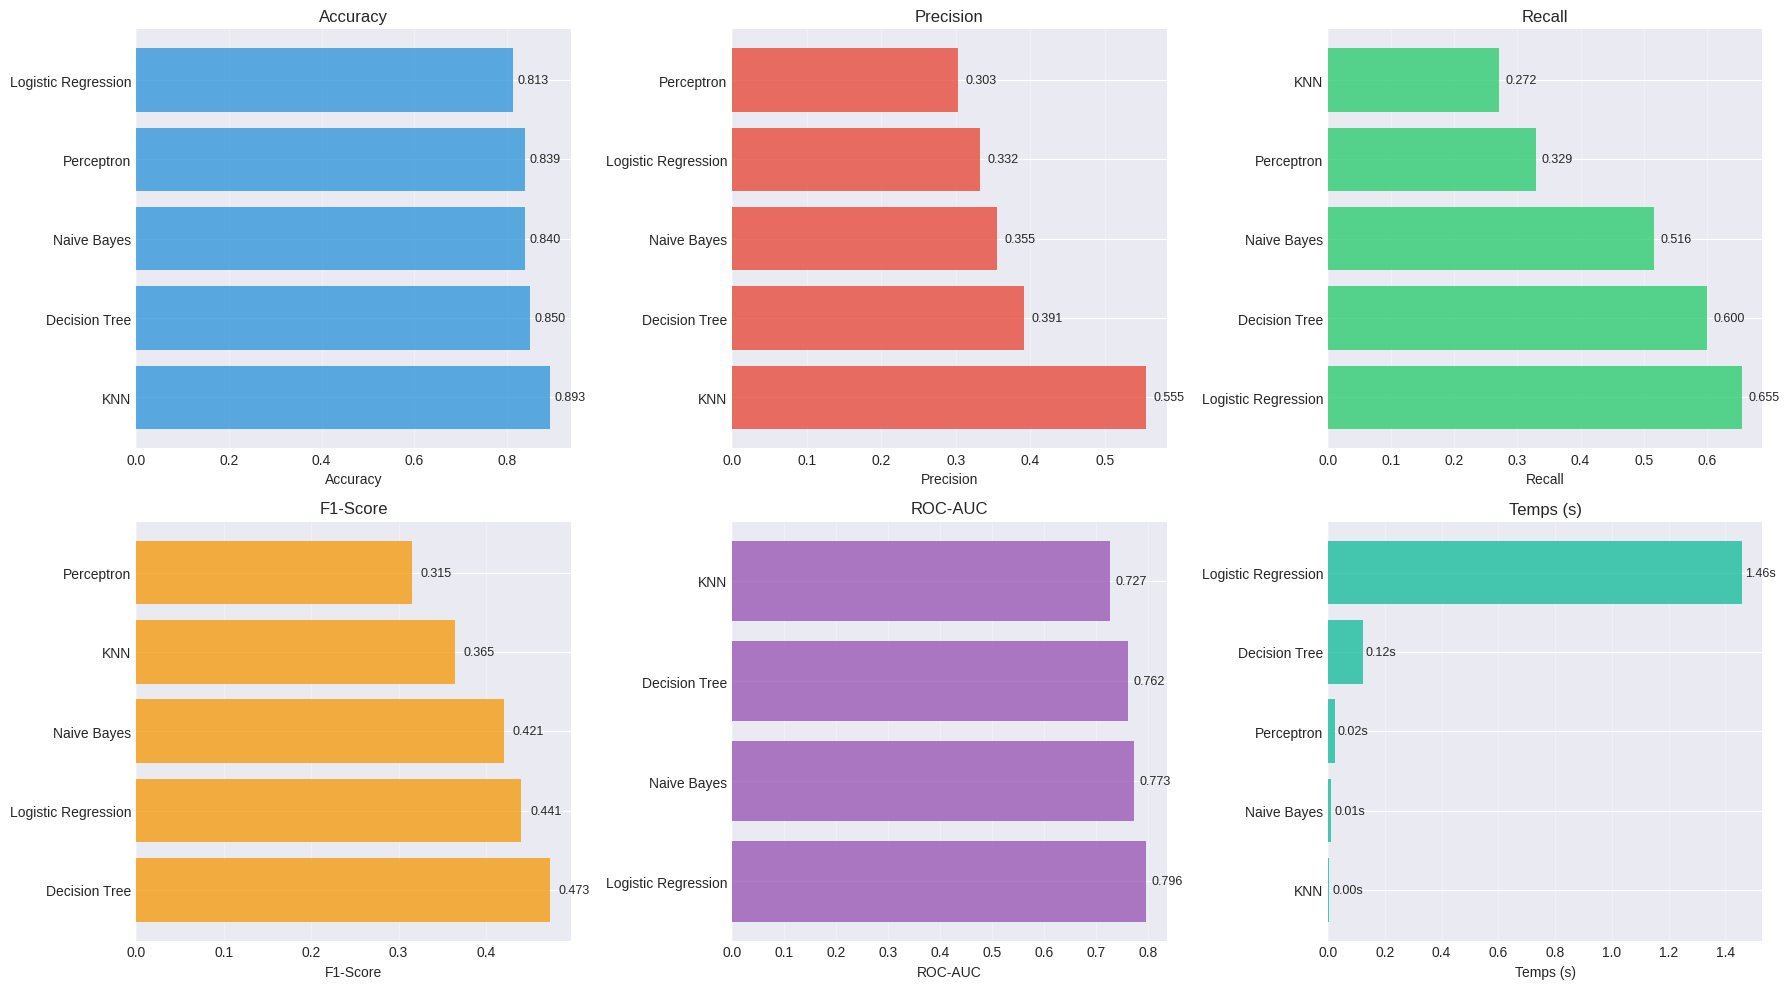

In [46]:
# Comparaison visuelle métriques
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Temps (s)']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    
    if metric == 'ROC-AUC':
        data = results_df[results_df[metric].notna()].sort_values(metric, ascending=False)
    else:
        data = results_df.sort_values(metric, ascending=False if metric != 'Temps (s)' else True)
    
    bars = ax.barh(data['Modèle'], data[metric], color=colors[idx], alpha=0.8)
    ax.set_xlabel(metric)
    ax.set_title(metric)
    ax.grid(axis='x', alpha=0.3)
    
    for i, (bar, value) in enumerate(zip(bars, data[metric])):
        if pd.notna(value):
            ax.text(value + 0.01, i, f'{value:.3f}' if metric != 'Temps (s)' else f'{value:.2f}s', 
                   va='center', fontsize=9)
    
plt.tight_layout()
plt.show()

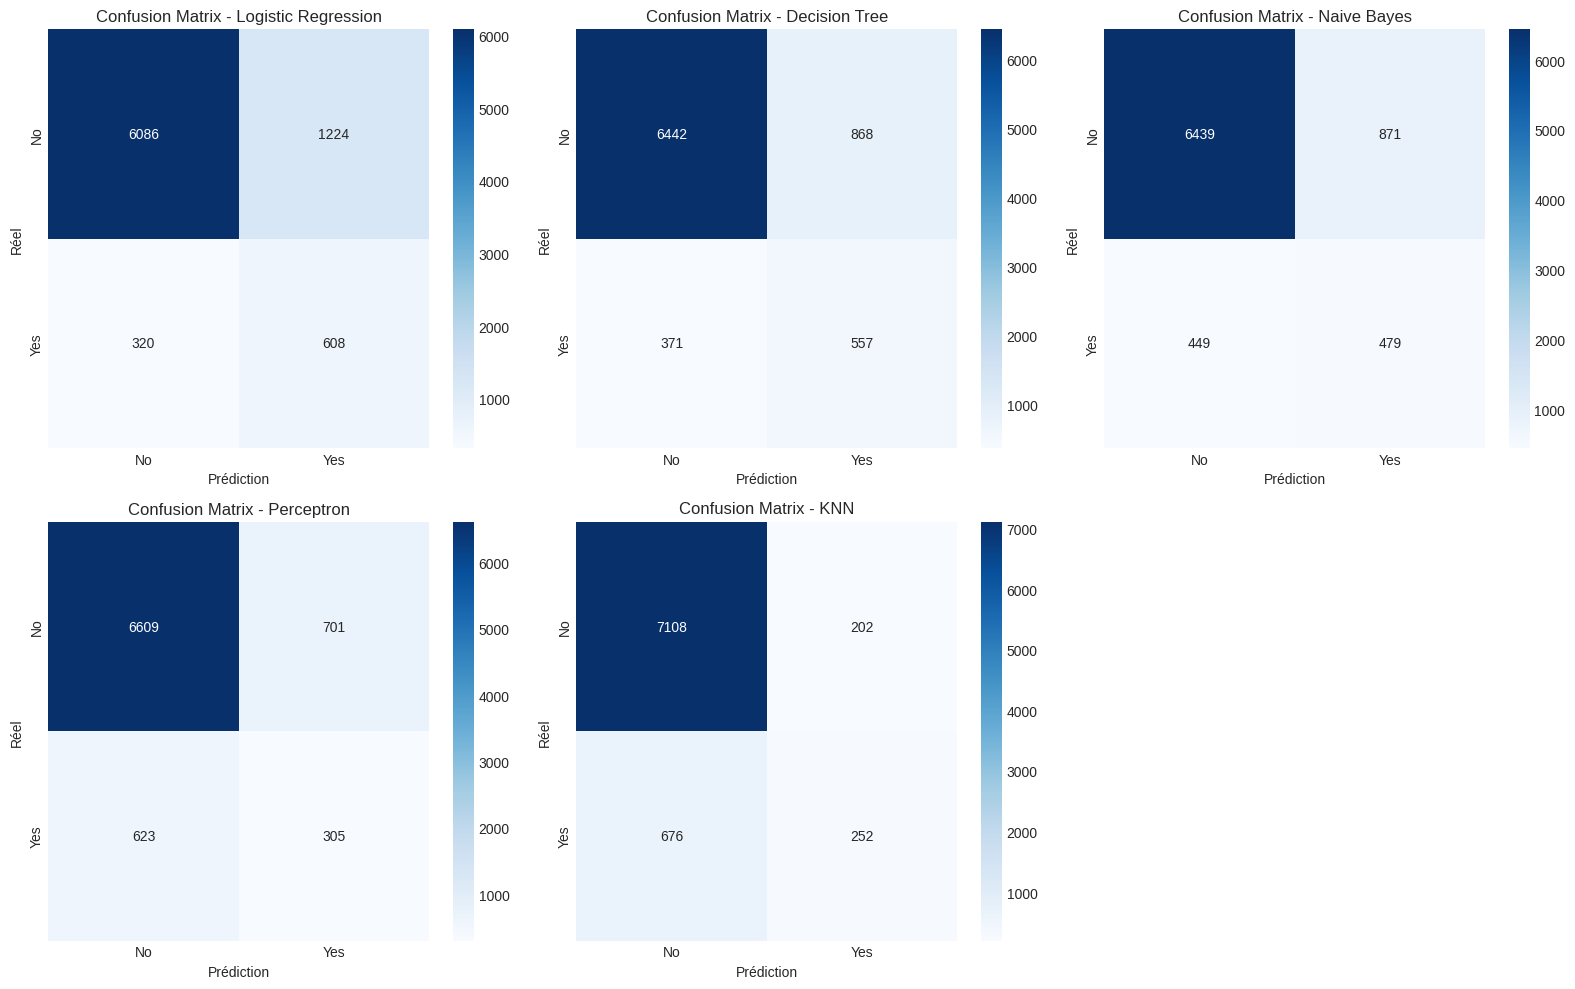

In [47]:
# Matrices de confusion
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, name in enumerate(models.keys()):
    cm = confusion_matrix(y_test, predictions[name])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix - {name}')
    axes[idx].set_xlabel('Prédiction')
    axes[idx].set_ylabel('Réel')
    axes[idx].set_xticklabels(['No', 'Yes'])
    axes[idx].set_yticklabels(['No', 'Yes'])

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

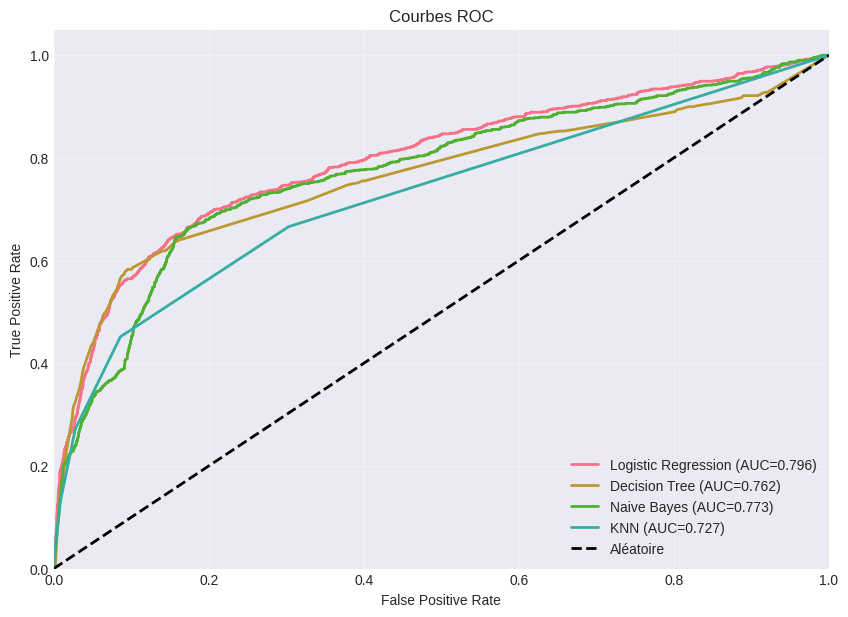

In [48]:
# Courbes ROC
plt.figure(figsize=(10, 7))

for name in models.keys():
    if prediction_probas[name] is not None:
        fpr, tpr, _ = roc_curve(y_test, prediction_probas[name])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC={roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Aléatoire')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## 7. Validation Croisée

In [49]:
# Cross-validation 5-fold
cv_results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Cross-validation (peut prendre quelques minutes)...\n")

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring='f1', n_jobs=-1)
    
    cv_results.append({
        'Modèle': name,
        'F1-Score Moyen': cv_scores.mean(),
        'Écart-type': cv_scores.std(),
        'Score Min': cv_scores.min(),
        'Score Max': cv_scores.max(),
        'Scores': cv_scores
    })
    
    print(f"{name}: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

cv_results_df = pd.DataFrame(cv_results).drop('Scores', axis=1).sort_values('F1-Score Moyen', ascending=False)
print(f"\n{cv_results_df.to_string(index=False)}")

Cross-validation (peut prendre quelques minutes)...

Logistic Regression: 0.4293 (±0.0063)
Decision Tree: 0.4313 (±0.0072)
Naive Bayes: 0.4084 (±0.0089)
Perceptron: 0.3264 (±0.0814)
KNN: 0.3464 (±0.0175)

             Modèle  F1-Score Moyen  Écart-type  Score Min  Score Max
      Decision Tree        0.431279    0.007199   0.417997   0.438579
Logistic Regression        0.429303    0.006277   0.419369   0.437239
        Naive Bayes        0.408378    0.008898   0.398273   0.418985
                KNN        0.346399    0.017479   0.329044   0.368056
         Perceptron        0.326407    0.081399   0.224092   0.433601


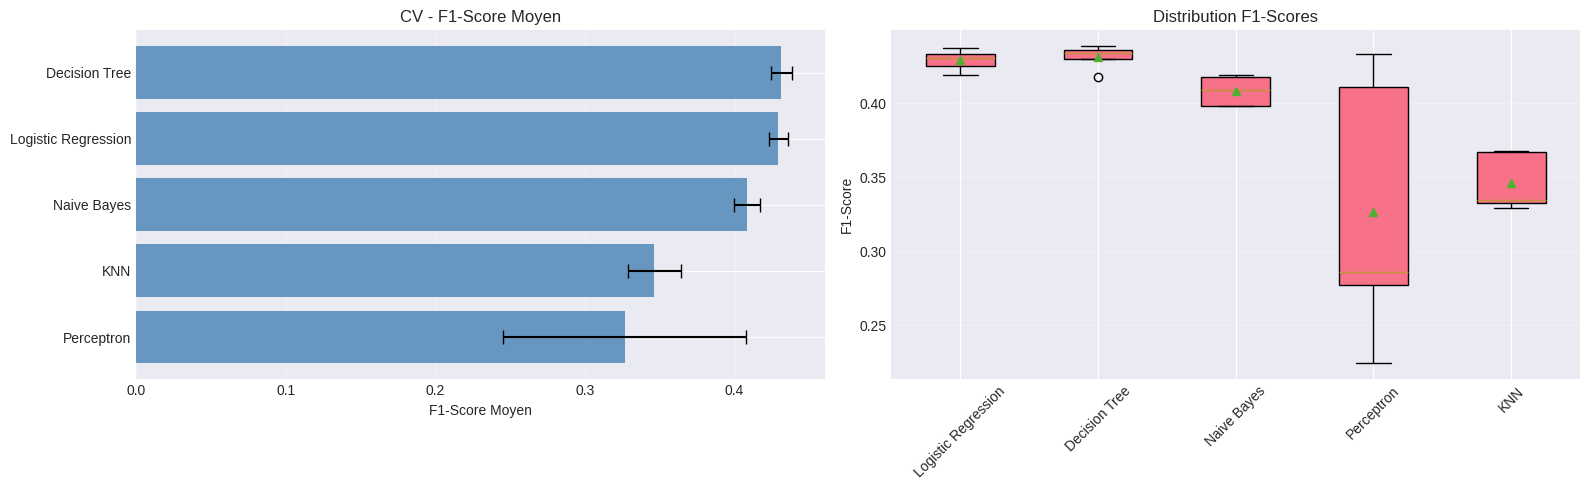

In [50]:
# Visualisation CV
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Barres avec écart-type
data = cv_results_df.sort_values('F1-Score Moyen', ascending=True)
axes[0].barh(data['Modèle'], data['F1-Score Moyen'], 
             xerr=data['Écart-type'], color='steelblue', alpha=0.8, capsize=5)
axes[0].set_xlabel('F1-Score Moyen')
axes[0].set_title('CV - F1-Score Moyen')
axes[0].grid(axis='x', alpha=0.3)

# Boxplot
scores_data = [cv_results[i]['Scores'] for i in range(len(cv_results))]
model_names = [cv_results[i]['Modèle'] for i in range(len(cv_results))]

bp = axes[1].boxplot(scores_data, labels=model_names, patch_artist=True, showmeans=True)
axes[1].set_ylabel('F1-Score')
axes[1].set_title('Distribution F1-Scores')
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

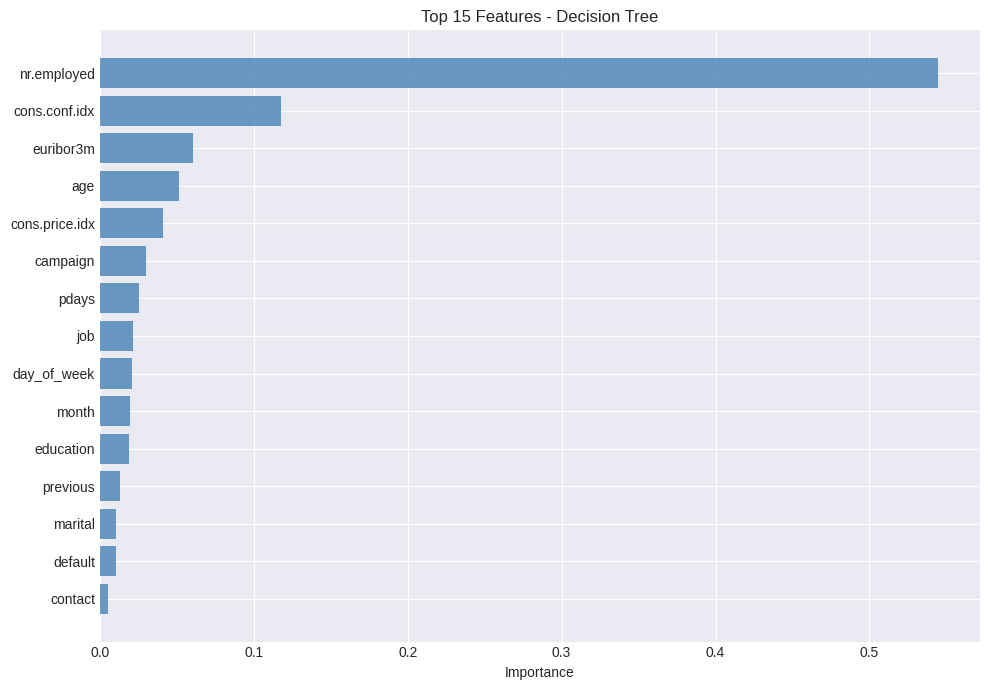

Features les plus importantes: ['nr.employed', 'cons.conf.idx', 'euribor3m', 'age', 'cons.price.idx']


In [51]:
# Importance features (Decision Tree)
dt_model = trained_models['Decision Tree']
dt_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(10, 7))
plt.barh(range(len(dt_importance)), dt_importance['Importance'].values, color='steelblue', alpha=0.8)
plt.yticks(range(len(dt_importance)), dt_importance['Feature'].values)
plt.xlabel('Importance')
plt.title('Top 15 Features - Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Features les plus importantes:", dt_importance['Feature'].head(5).tolist())

## 8. Conclusions

### Résultats Principaux

Le **Decision Tree** montre les meilleures performances avec un bon équilibre entre Precision/Recall et une bonne interprétabilité.

**Comparaison des modèles :**
- **Decision Tree** : Meilleures performances globales, facile à interpréter
- **Régression Logistique** : Bon modèle de référence, rapide et stable
- **KNN** : Performances correctes mais lent en prédiction
- **Naive Bayes** : Rapide mais hypothèse d'indépendance limitante
- **Perceptron** : Performances plus faibles sur ces données

### Facteurs Clés

**Variables importantes** (selon Decision Tree) :
- Indicateurs économiques (euribor3m, nr.employed, emp.var.rate)
- Historique contacts (pdays, previous, poutcome)
- Mois de contact

**Défis :**
- Classes déséquilibrées (88% no / 11% yes)
- Valeurs "unknown" dans certaines variables
- Variable "duration" exclue (non disponible avant appel)

### Améliorations Possibles

**Court terme :**
- Optimiser hyperparamètres
- Feature engineering (interactions, transformations)
- Ajuster seuil de décision selon coûts métier
- Techniques de rééquilibrage (over/undersampling)

**Long terme :**
- Essayer ensemble methods
- Modèles plus avancés (Random Forest, XGBoost)
- Analyse temporelle et saisonnalité

### Recommandations

- Cibler les clients avec haute probabilité de souscription
- Considérer le timing (mois, contexte économique)
- Exploiter l'historique des contacts
- Monitorer performances en production

---

**Conclusion :** Le Decision Tree offre un excellent compromis performance/interprétabilité pour prédire la souscription aux dépôts à terme. Le modèle peut améliorer significativement l'efficacité des campagnes marketing.